In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 43.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine import transformation as vt

In [3]:
# load the the Boston House price data from Scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# display top 5 rows (not in book recipe)
data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


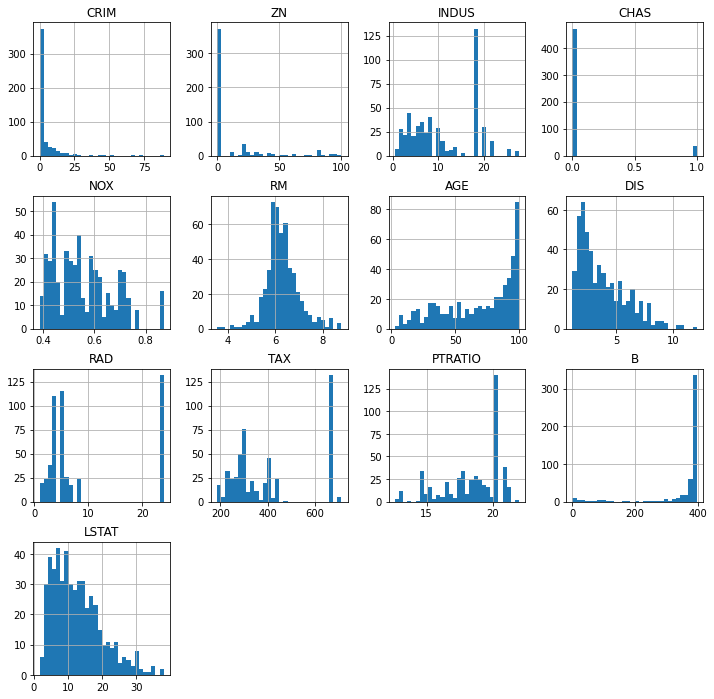

In [4]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [5]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

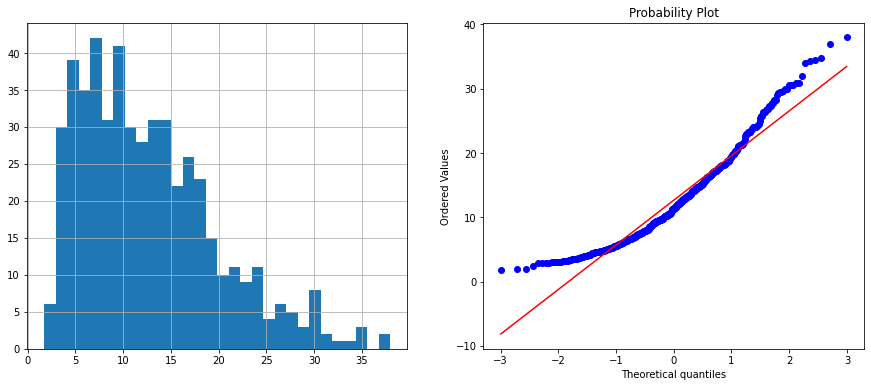

In [6]:
# check original distribution

diagnostic_plots(data, 'LSTAT')

###**Logarithmic transformation with NumPy**

In [7]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [8]:
# apply log to a set of variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(
    data[['LSTAT', 'NOX', 'DIS', 'RM']])

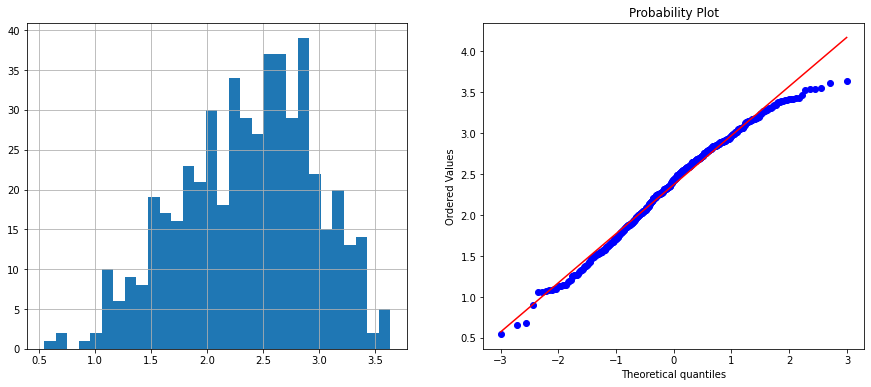

In [9]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'LSTAT')

###**Logarithmic transformation with Scikit-learn**

In [10]:
# start the transformer with NumPy log as argument
transformer = FunctionTransformer(np.log, validate=True)

In [11]:
# make a list of columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [12]:
# capture returned NumPy array in pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

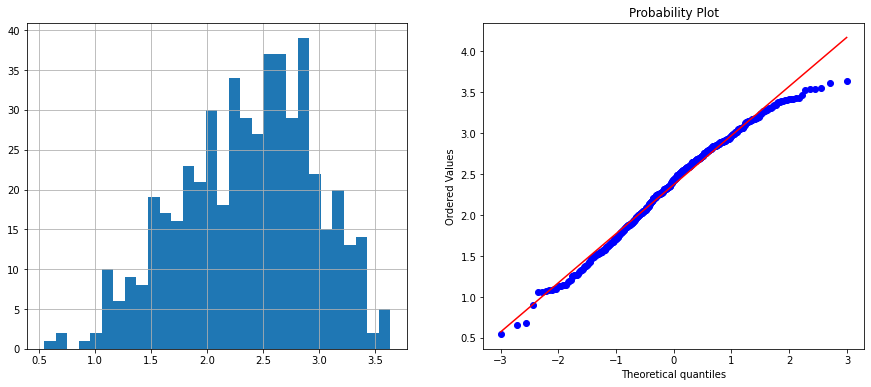

In [13]:
# use diagnostic plot function to evaluate transformation
# (not in book)
diagnostic_plots(data_tf, 'LSTAT')

###**Logarithmic transformation with Feature-engine**

In [14]:
# initialize the transformer
lt = vt.LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to data set
lt.fit(data)

LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [15]:
# transform variables within our data set
data_tf = lt.transform(data)

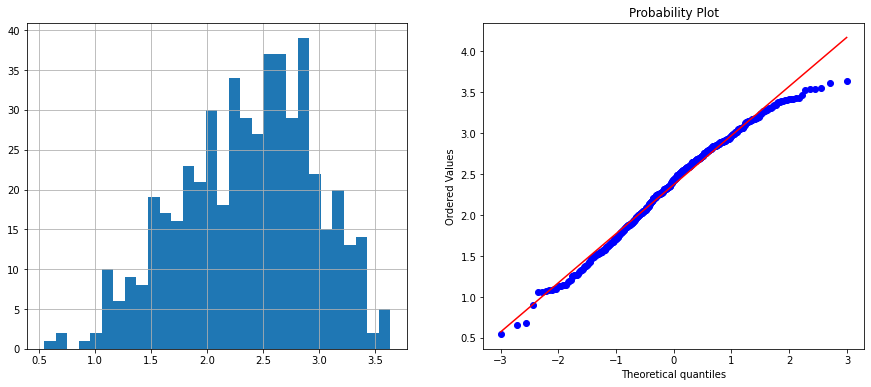

In [16]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'LSTAT')

###**Logarithm with Scikit-learn selecting a group of variables Not in book**

In [17]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
# load data set
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [19]:
# list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# set transformer within a pipeline
log_transformer = Pipeline(steps=[('log_transformer',
                                   FunctionTransformer(np.log, validate=True))])

# set pipeline within ColumnTransformer to select features
preprocessor = ColumnTransformer(transformers=[
    ('log_transformer', log_transformer, cols)], remainder='passthrough')

In [20]:
# fit to the data (the entire dataframe this time)
preprocessor.fit(data)

# transform the data
data_tf = preprocessor.transform(data)

In [21]:
# visualize the data as a pandas dataframe
pd.DataFrame(data_tf)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.605430,-0.619897,1.408545,1.883275,0.00632,18.0,2.31,0.0,65.2,1.0,296.0,15.3,396.90
1,2.212660,-0.757153,1.602836,1.859574,0.02731,0.0,7.07,0.0,78.9,2.0,242.0,17.8,396.90
2,1.393766,-0.757153,1.602836,1.971996,0.02729,0.0,7.07,0.0,61.1,2.0,242.0,17.8,392.83
3,1.078410,-0.780886,1.802073,1.945624,0.03237,0.0,2.18,0.0,45.8,3.0,222.0,18.7,394.63
4,1.673351,-0.780886,1.802073,1.966693,0.06905,0.0,2.18,0.0,54.2,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2.269028,-0.556870,0.907694,1.886008,0.06263,0.0,11.93,0.0,69.1,1.0,273.0,21.0,391.99
502,2.206074,-0.556870,0.827460,1.811562,0.04527,0.0,11.93,0.0,76.7,1.0,273.0,21.0,396.90
503,1.729884,-0.556870,0.773574,1.942476,0.06076,0.0,11.93,0.0,91.0,1.0,273.0,21.0,396.90
504,1.868721,-0.556870,0.870833,1.916040,0.10959,0.0,11.93,0.0,89.3,1.0,273.0,21.0,393.45


###**Recipe-2-reciprocal-transformation**

###**Reciprocal transformation with NumPy**

In [22]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [23]:
# apply the reciprocal to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.reciprocal(data[['LSTAT', 'NOX', 'DIS', 'RM']])

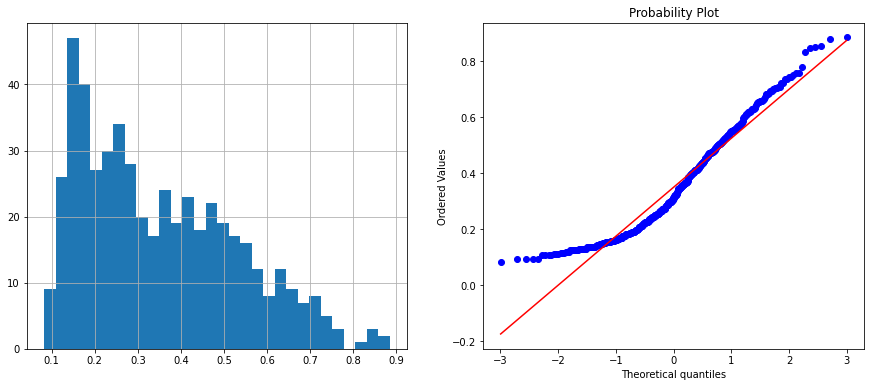

In [24]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'DIS')

###**Reciprocal transformation with Scikit-learn**

In [25]:
# start the transformer with NumPy reciprocal as argument

transformer = FunctionTransformer(np.reciprocal, validate=True)

In [26]:
# make a list of columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [27]:
# capture returned NumPy array in pandas dataframe

data_tf = pd.DataFrame(data_tf, columns=cols)

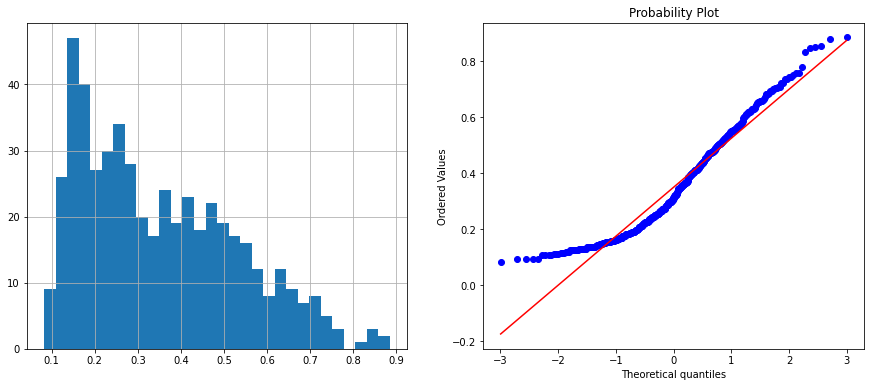

In [28]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'DIS')

###**Reciprocal transformation with Feature-engine**

In [29]:
# initialize the transformer
rt = vt.ReciprocalTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the entire dataframe
rt.fit(data)

ReciprocalTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [30]:
# transform the indicated variables within our data set
data_tf = rt.transform(data)

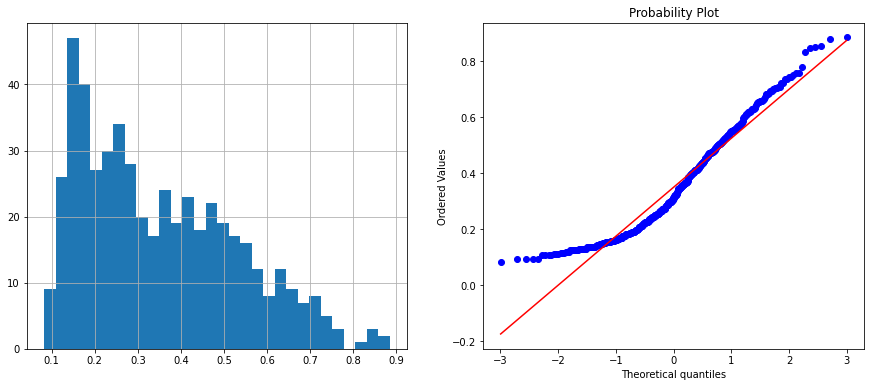

In [31]:
# use diagnostic plot function to evaluate transformation
# (not in book)

diagnostic_plots(data_tf, 'DIS')

###**Recipe-3-square-cube-root**

###**Square / Cube root transformation with NumPy**

In [32]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [33]:
# apply the square root transformation to a set of variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.sqrt(data[['LSTAT', 'NOX', 'DIS', 'RM']])

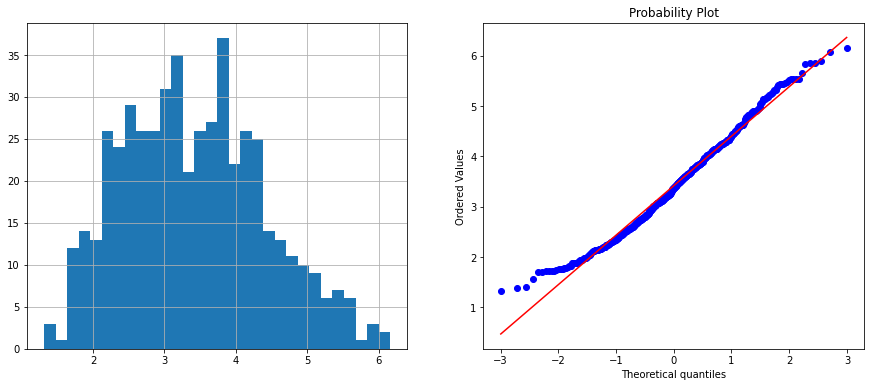

In [34]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'LSTAT')

In [35]:
# apply the cube root transformation to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.cbrt(data[['LSTAT', 'NOX', 'DIS', 'RM']])

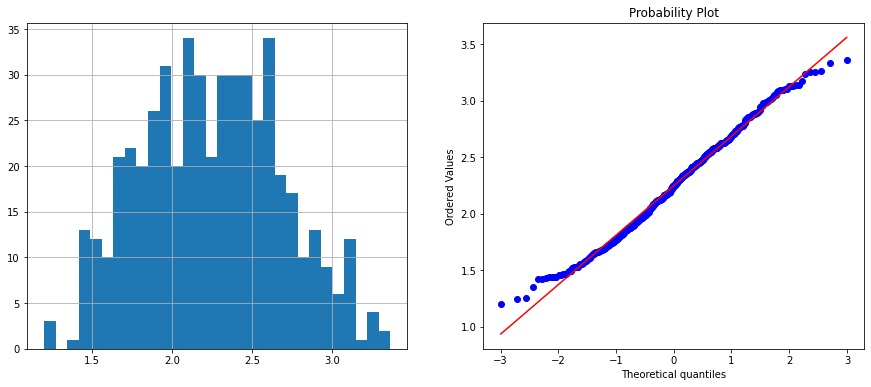

In [36]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'LSTAT')

###**Square / Cube root transformation with Scikit-learn**

In [37]:
# start the transformer with NumPy sqrt as argument

transformer = FunctionTransformer(np.sqrt, validate=True)

In [38]:
# make a list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
# returns NumPy array
data_tf = transformer.transform(data[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [39]:
# capture NumPy array into dataframe (not in book) 
data_tf = pd.DataFrame(data_tf, columns=cols)

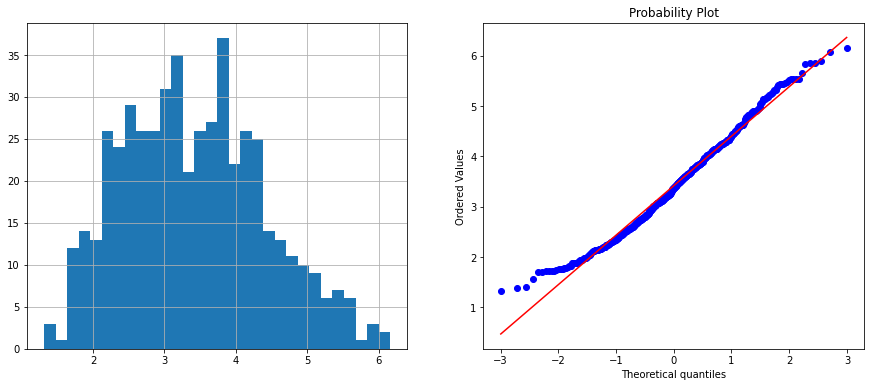

In [40]:
#make plot to visualize transformation (not included in book)
diagnostic_plots(data_tf, 'LSTAT')

##**Il y a plus...**
###**Seulement résumé dans le livre, le code n'est pas présent**
Appliquer la racine carrée et cubique avec Feature-engine

In [41]:
from feature_engine import transformation as vt

In [42]:
# set up PowerTransformer with the square root exponent
et = vt.PowerTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(data)

PowerTransformer(exp=0.3333333333333333,
                 variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [43]:
# transform indicated variables within our dataframe
data_tf = et.transform(data)

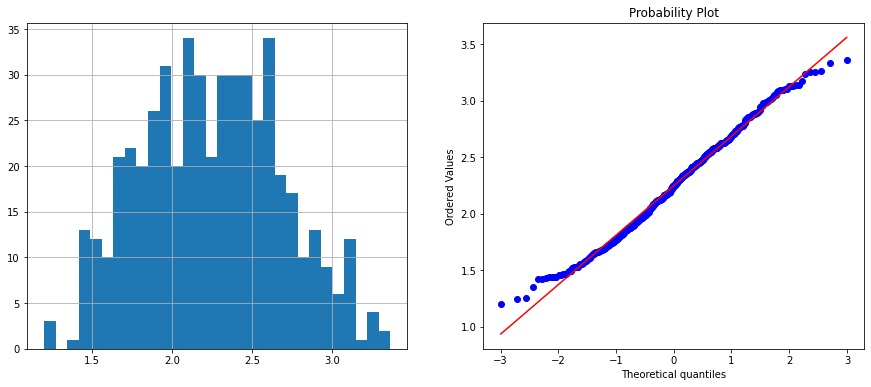

In [44]:
# visualize the trasnformation

diagnostic_plots(data_tf, 'LSTAT')

###**Exponential transformation with NumPy**

In [45]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [46]:
# apply a 0.3 exponent power transformation to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.power(data[['LSTAT', 'NOX', 'DIS', 'RM']], 0.3)

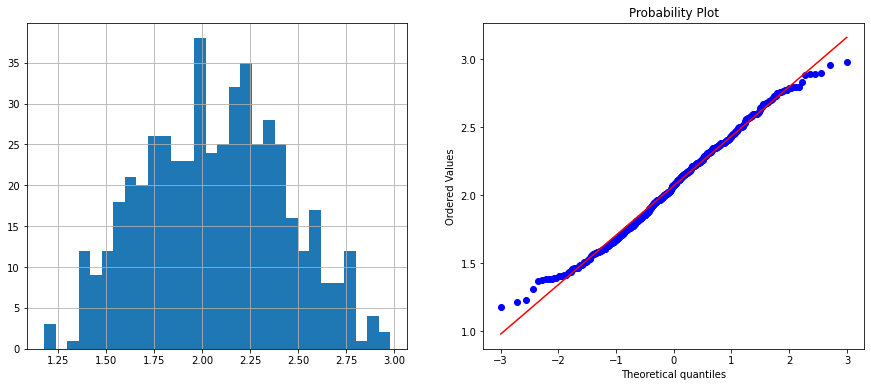

In [47]:
# visuallize the transformation (not included in recipe)

diagnostic_plots(data_tf, 'LSTAT')

###**Exponential transformation with Scikit-learn**

In [48]:
# initialize the transformer with a user defined function, in this
# case the 0.3 power transformation

transformer = FunctionTransformer(lambda x: np.power(x, 0.3), validate=True)

In [49]:
# capture variables to transform in a list
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
data_tf = transformer.transform(data[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [50]:
# capture returned NumPy array into a dataframe

data_tf = pd.DataFrame(data_tf, columns=cols)

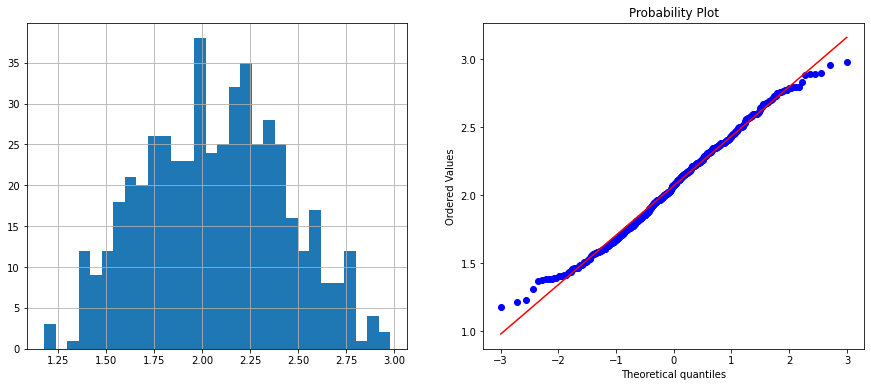

In [51]:
# visualize the transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

###**Exponential transformation with Feature-engine**

In [52]:
# initialize the transformer with the variables to transform and 
# the desired exponent

et = vt.PowerTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'], exp=0.3)

# fit transformer to data
et.fit(data)

PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [53]:
# transform indicated variables in the dataset
data_tf = et.transform(data)

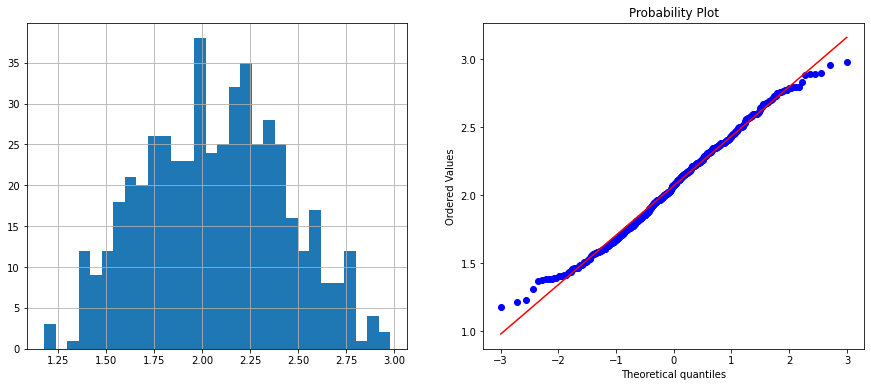

In [54]:
# plot transform variable
diagnostic_plots(data_tf, 'LSTAT')

###**There is more**
###**Not included in the book**
+ Apply different power transformations to different set of features using Feature-engine

In [55]:
from sklearn.pipeline import Pipeline

In [57]:
pipe = Pipeline([
    ('power1', vt.PowerTransformer(variables = ['LSTAT', 'NOX'], exp=0.3)),    
    ('power2', vt.PowerTransformer(variables = ['DIS'], exp=0.4)),
    ('power3', vt.PowerTransformer(variables = ['RM'], exp=0.5)),
     ])

In [58]:
pipe.fit(data)

Pipeline(steps=[('power1',
                 PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX'])),
                ('power2', PowerTransformer(exp=0.4, variables=['DIS'])),
                ('power3', PowerTransformer(variables=['RM']))])

In [61]:
data_tf = pipe.transform(data)
data_tf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.830299,2.564176,65.2,1.756667,1.0,296.0,15.3,396.90,1.618709
1,0.02731,0.0,7.07,0.0,0.796805,2.533969,78.9,1.898634,2.0,242.0,17.8,396.90,1.942155
2,0.02729,0.0,7.07,0.0,0.796805,2.680485,61.1,1.898634,2.0,242.0,17.8,392.83,1.519118
3,0.03237,0.0,2.18,0.0,0.791151,2.645373,45.8,2.056137,3.0,222.0,18.7,394.63,1.381988
4,0.06905,0.0,2.18,0.0,0.791151,2.673387,54.2,2.056137,3.0,222.0,18.7,396.90,1.652031


###**Box-Cox transformation with SciPy**

In [62]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

Optimal λ:  0.22776736893884023


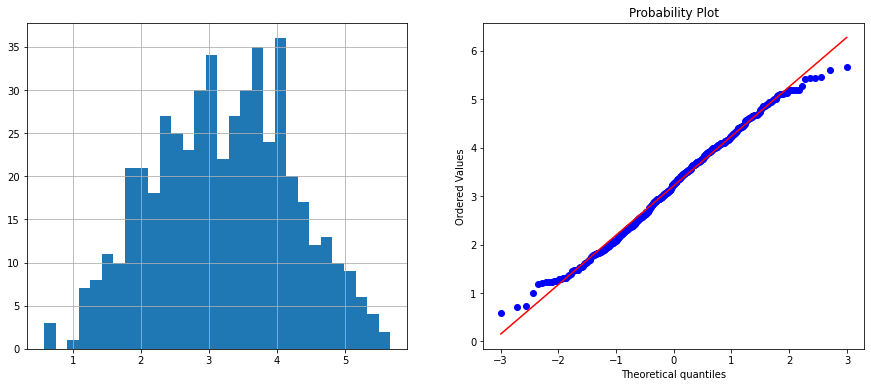

In [69]:
# apply the Box-Cox transformation to variable LSTAT
data_tf['LSTAT'], param = stats.boxcox(data['LSTAT']) 

# print the optimal lambda found for LSTAT
print('Optimal λ: ', param)
print("==================================="*3)
# visualize the transformed variable (not in book chapter)
diagnostic_plots(data_tf, 'LSTAT')

###**Box-Cox transformation with Scikit-learn**

In [78]:
# initialize the transformer with box-cox
from sklearn.preprocessing import PowerTransformer
transformer =  PowerTransformer(method='box-cox', standardize=False)

In [79]:
# make list with columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

In [80]:
# fit transformer to slice of dataframe with indicated variables
# transformer will learn the lambdas
transformer.fit(data[cols])

PowerTransformer(method='box-cox', standardize=False)

In [81]:
# lambdas are stored in a transformer attribute (not in book)
transformer.lambdas_

array([ 0.22776737, -0.91561209, -0.15560583,  0.44895979])

In [82]:
# transform slice of dataframe with indicated variables
# returns NumPy array
data_tf = transformer.transform(data[cols])

In [83]:
# transform NumPy array to pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

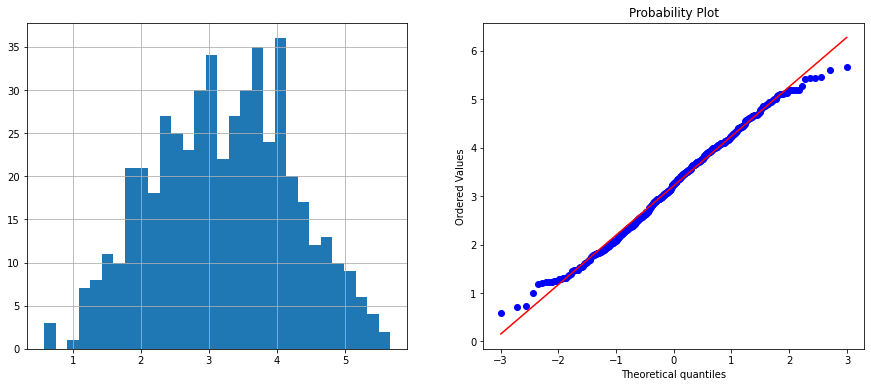

In [84]:
# visualize transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

###**Box-Cox transformation with Feature-engine**

In [86]:
# initialize the transformer with a group of variables to transform
bct = vt.BoxCoxTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the data set
bct.fit(data)

BoxCoxTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [87]:
# transform the indicated variables in our dataframe
# returns a new dataframe

data_tf = bct.transform(data)

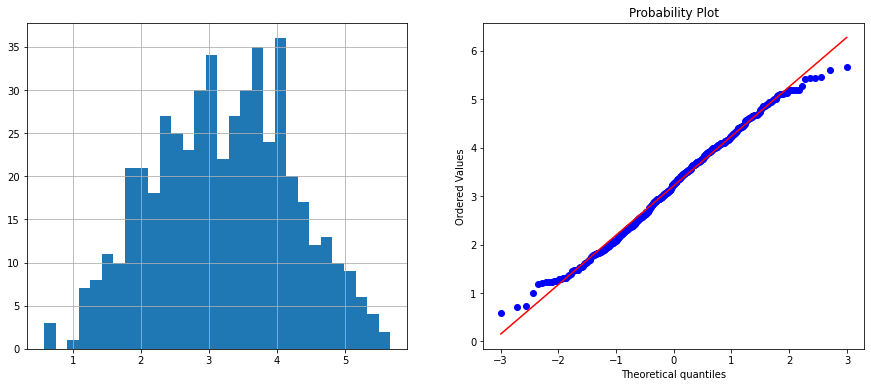

In [88]:
# visualize the distribution (not in book)
diagnostic_plots(data_tf, 'LSTAT')

In [89]:
# the transformer stores the optimal parameter for each 
# variable in a dictionary in its attribute lambda_dict_

bct.lambda_dict_

{'DIS': -0.15560583167193484,
 'LSTAT': 0.22776736893884023,
 'NOX': -0.9156120907279849,
 'RM': 0.4489597919730037}

####**Yeo-Johnson transformation with SciPy**

In [90]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

Optimal λ:  0.15370552301825943


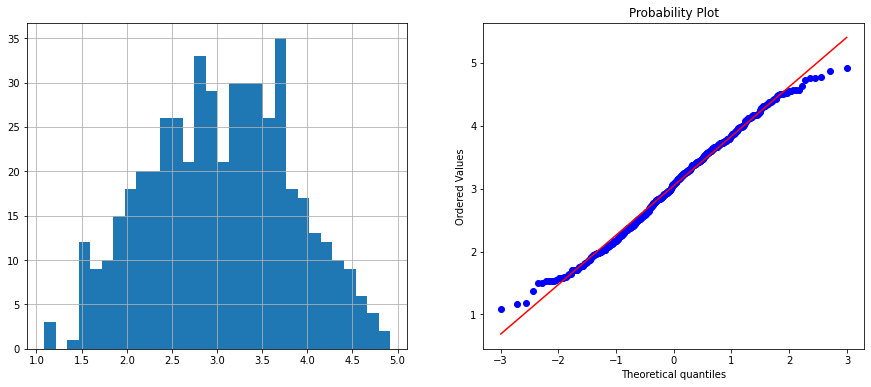

In [91]:
# apply the Yeo_johnson transformation to the variable LSTAT

data_tf['LSTAT'], param = stats.yeojohnson(data['LSTAT']) 

# print the optimal lambda selected for this variable
print('Optimal λ: ', param)

# visualize the transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

####**Ye-Johnson transformation with Scikit-learn**

In [92]:
# initialize a transformer with yeo-johnson
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

In [93]:
# select variables to transform in a list
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

In [94]:
# fit transformer to the slice of data with the indicated variables
transformer.fit(data[cols])

PowerTransformer(standardize=False)

In [95]:
# the transformer stores the learned lambdas in its attribute
transformer.lambdas_

array([ 0.15370552, -3.97371104, -0.44887192,  0.33298652])

In [96]:
# transform indicated variables
data_tf = transformer.transform(data[cols])

In [97]:
# capture NumPy array into dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

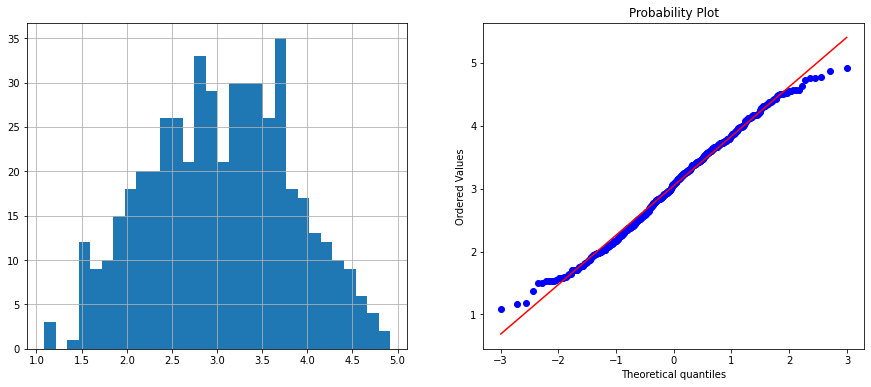

In [98]:

# plot the distribution (not in book)
diagnostic_plots(data_tf, 'LSTAT')

###**Yeo-Johnson transformation with Feature-engine**

In [99]:
# initialize the transformer with a subset of variables to transform
yjt = vt.YeoJohnsonTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])

# fit transformer to the dataframe
yjt.fit(data)

YeoJohnsonTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [100]:
# transform indicated variables

data_tf = yjt.transform(data)

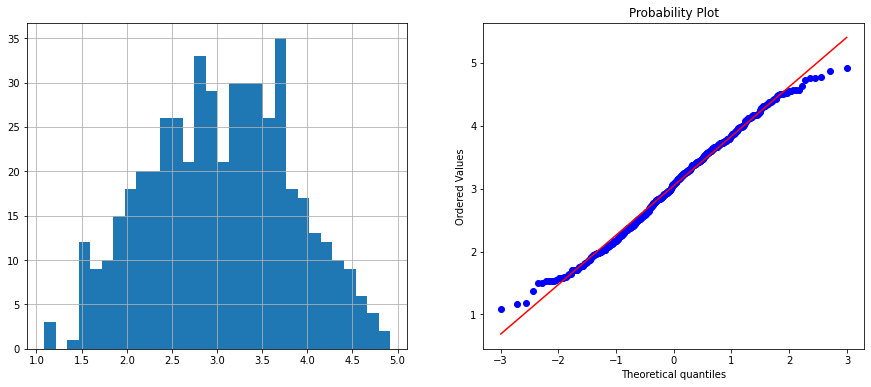

In [101]:
# make diagnostic plot of transformed variable (not in book)
diagnostic_plots(data_tf, 'LSTAT')

In [102]:
# the transformer stores the learned parameters for each variable
# in a dictionary as an attribute

yjt.lambda_dict_

{'DIS': -0.4488719212889845,
 'LSTAT': 0.15370552301825943,
 'NOX': -3.9737110448770623,
 'RM': 0.3329865194470187}